# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [5]:
#error tryna import decisionboundarydisplay... couldn't figure out
#how to use that anyway

#lol not sure what this did but...
# pip install mlxtend
#successful

## 1b. Load data 

In [3]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv('data/RRDinerCoffeeData.csv')

## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [19]:
# Call head() on your data 
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [20]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [21]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [22]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`,         `spent_month`,      `SlrAY` to:
                                `spent_last_week` and `spent_last_month`, `salary` respectively.

In [26]:
# Check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [27]:
coffeeData.columns=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Online', 'Decision']

In [28]:
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [29]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [ ]:
# Make the relevant name changes to spent_week and spent_per_week.
#did above

In [ ]:
# Check out the column names

#did

In [5]:
# Let's have a closer look at the gender column. Its values need cleaning.
coffeeData.Gender.value_counts()

Male      355
Female    340
female      1
F           1
f           1
FEMALE      1
MALE        1
male        1
M           1
Name: Gender, dtype: int64

In [ ]:
#lol literally 'ONE-OFFS'! one of each of the few deviations, could just delete ;P
#this is where i like interactive clickable GUIs better
#annoying to code/type, no manual (literally, by HAND!) control

In [40]:
coffeeData.Gender.unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [6]:
mapping={'female':'Female', 'F':'Female', 'f ':'Female', 'FEMALE':'Female', 'MALE':'Male', 'male':'Male',
       'M':'Male'}

coffeeData.Gender = coffeeData.Gender.replace(mapping)
coffeeData.Gender.unique()


array(['Female', 'Male'], dtype=object)

In [ ]:
#Alhamdulillahi Rabbil 'Aalameen!

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [ ]:
# Replace all alternate values for the Female entry with 'Female'
#done!

In [ ]:
# Check out the unique values for the 'gender' column
#done!

In [ ]:
# Replace all alternate values with "Male"
#done aH!

In [ ]:
# Let's check the unique values of the column "gender"
#done! aH

In [7]:
# Check out the unique values of the column 'Decision'
coffeeData.Decision.value_counts()

1.0    303
0.0    171
Name: Decision, dtype: int64

In [ ]:
#I REALIZED THAT I LIKE TO DO VALUE_COUNTS PERSONALLY RATHER THAN JUST .UNIQUE() values CUZ
#IT GIVES YOU THE *SAME* INFO, +PLUS+ *MORE*!!! gives you an idea of HOW BAD / prevalent
# a problem is! but it's also more organized/easier to view!

#BUT FORGOT!!! ONLY PROBLEM IS VALUE COUNTS DOESN'T SHOW NAN'S!!! which is very important!!! see below!

In [ ]:
#oh but unless you do return_counts=True?? although didn't work for me - see below!

In [8]:
coffeeData.Decision.unique()

array([ 1., nan,  0.])

In [29]:
coffeeData.Decision.unique(return_counts=True)

TypeError: unique() got an unexpected keyword argument 'return_count'

In [ ]:
#THIS IS WHAT WE WANT / NEED!!! THIS IS WHY YOU GOTTA DO .UNIQUE!!! at least in ADDITION to!!

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [9]:
#OHHH! don't use quotes cuz it's INTEGERS!!! THAT WAS FOR STRINGS!!!
mapping = {1:'Yes', 0:'No'}
coffeeData.Decision = coffeeData.Decision.replace(mapping)
coffeeData.Decision.value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

In [ ]:
#NICE ALHAMDULILLAH!!!
# note that we didn't have to even put the decimal! like didn't literally
#have to put 1.0 & 0.0 even though that's how it was displayed! i guess in this case, where it
#was literal / exact and not just truncated / rounded. cuz w/ exact @ .0/ON the ZERO, doesn't matter if million
#decimals or NO decimals! all the same!

In [10]:
coffeeData.Decision.unique()

array(['Yes', nan, 'No'], dtype=object)

In [ ]:
#THERE SHE BLOWS!!!!!!

In [ ]:
#okay so for now we still got the NaNs but at least successfully changed the numbers to words!

#NOTE! it turns out it seems like this is for dummifying it later - but then we should've done ONLINE
#category too cuz then could've just left columns arg blank and it would've auto-took care of it!

In [53]:
#lol now's a good time to do a safety/backup/restore, in case i mess up!
#should do after each alteration of the dataset/df!
coffeeData_backup = coffeeData.copy()

In [ ]:
#above if you look closely they actually indicated to make em as ALL CAPS AKA 'YES' & 'NO'!!!!
#but i didn't do that and did way i like which was my way 'Yes' & 'No'
#then turns out HERE they do to tell you to do way i did it
#but then later in notebook they want all caps lol

In [ ]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'

#done aH

In [11]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
#done aH


#done!

## 2b. Train/test split

In [ ]:
#LOL! man this unit was so much different than the others. w/ the others, we had lots
#of practice beforehand w/ proper datacamp classes etc, and so knew the code and theory etc
# or at least it was an option
# but here, all we had were those poorly explained instructional videos AND WE NEVER ONCE SAW
# ANY CODE FOR THIS BUT NOW HAVE A CODING ASSIGNMENT!? i mean okay it appeared ONCE in passing
# in the last data camp course on supervised learning, just as another model to check in our
# cross-val, since like he said they all work the exact same way, all we need to do is instantiate!
# so i think they threw in a randomforest in there! and ofc Spiegs mentioned their theory of DT/RF
# but man they never even taught us how to do any coding for it and now have us doing a coding project!
#but i guess we should be able to figure it out iA
#in scikit-learn should feel pretty familiar to others, as Winston said, all follow same syntax,
#so it's like, once you know one, you know them all!

To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

In [ ]:
#OHH wait a minute - just realized, it CAN'T be that we're tryna predict whether they ACTUALLY
#will buy, as in how i was just wondering - like where it'd be a separate new column!
#IT HAS TO BE SOMETHING WE *ALREADY* HAVE DATA ON!!!!!! SO WE CAN TRAIN & TEST!!!!!
#CUZ WE DON'T HAVE ANY DATA ON WHETHER THEY *ACTUALLY* BOUGHT OR NOT OBVIOUSLY CUZ THAT'S THE WHOLE
#POINT!!!! WE'RE TRYNA *MAKE A DECISION* TO GET COFFEE/PRODUCT FROM THIS NEW SUPPLIER OR NOT!!!

In [10]:
#1. Drop rows w/ null vals in Decision


#IF YOU REMEMBER .info() WE DID DECISION WAS INDEED THE ONE THAT HAD *A *BUNCH* MISSING!!!


NOPrediction = coffeeData.dropna()
#YOU COULD SPECIFY THE COLUMN THAT HAS THE BLANKS BUT IN THIS CASE - REMEMBER/LOOK @ .INFO -
# *THE ONLY ONE THAT HAS MISSINGS *IS* DECISION*!!!!! THUS CAN LEAVE IT GENERAL!!!!! :D

NOPrediction.Decision.unique()

array([1., 0.])

In [ ]:
#so you see we're only keeping the ones WITH a decision, aka the 'non-nans'!!!!! ;P

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!

In [ ]:
######################################################################################################

#so it's pretty confusing but this set is called "NO Prediction", even tho these are the ones that DO have a prediction/indication

#so i realized they really don't do a good job of telling you the procedure at the beginning of what's
#going on here, which is why things were so confusing
#so, you're gonna test models that predict whether someone INDICATED they would buy or not. that's
#this dataset, that HAS that data. thus, we can train it, and save a piece for testing and scoring
#then, based on which did best, according to how we define that, we take that model and use it on
#the part of the original dataset that had MISSING 'Decision's, which we'll call 'Predict' and that's
#because we're gonna try to PREDICT what those missing decisions were and simply trust the model!
#that's at first, then we'll do it with a Random Forest ensemble/collage

#so yeah, this is 'No Predict', cuz we don't needa predict actual missing info.... but we will try
#to predict the test y's, as always...!

In [111]:
coffeeData.Decision.unique()

array(['Yes', nan, 'No'], dtype=object)

In [ ]:
#so here you see the diff!

In [112]:
NOPrediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   Gender                   474 non-null    object 
 2   num_coffeeBags_per_year  474 non-null    int64  
 3   spent_last_week          474 non-null    int64  
 4   spent_last_month         474 non-null    int64  
 5   salary                   474 non-null    int64  
 6   Distance                 474 non-null    float64
 7   Online                   474 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 37.0+ KB


In [ ]:
#lol at first i was like oh shoot - didn't we just lose a bunch of GOOD data? like this dropped
#the WHOLE row just cuz Decision was missing. even tho EVERYTHING ELSE is there. But - since we're tryna predict Decision,
#we literally CAN'T train on these rows without those!
#so what we'll have to do is just train on the rest and use that training to PREDICT these unknowns/missings/nans!

#but so yeah - we're not actually deleting these permanently! we're just 'saving' them for testing!
#but yeah we simply CAN'T use them for training!

In [114]:
#REMEM! another way to count nulls!:
coffeeData.Decision.isnull().sum()

228

In [115]:
#or
len(coffeeData)-coffeeData.Decision.value_counts().sum()

228

In [4]:
coffeeData.Decision.value_counts().sum()

474

In [ ]:
#there you go!

In [116]:
#grab the columns for here to use next
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [6]:
#2. Visualize data - scatterplots & boxplots
features=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online']

In [118]:
#lol forgot bout .show() THAT'LL MAKE IT DO A NEW PLOT EVERY ITERATION!!! otherwise will just overwrite
#on top of itself!
#our boy SNS is the best! auto labels axes & includes legends!!!

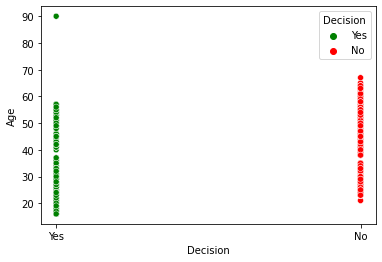

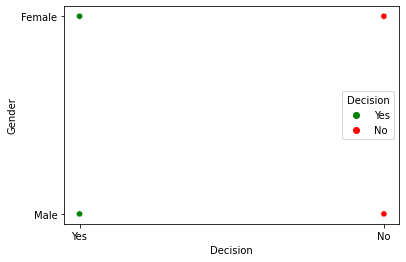

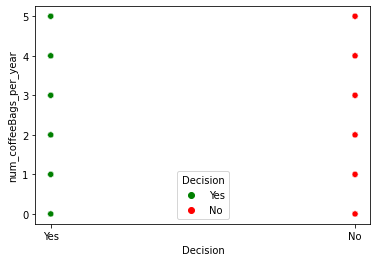

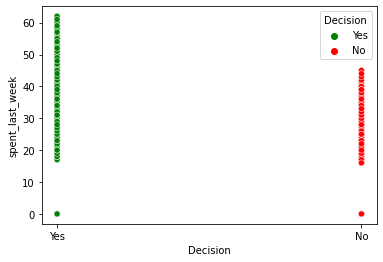

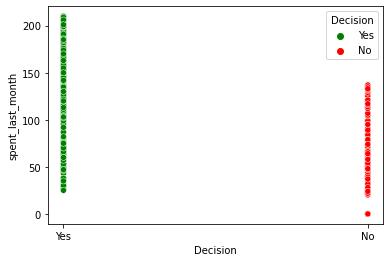

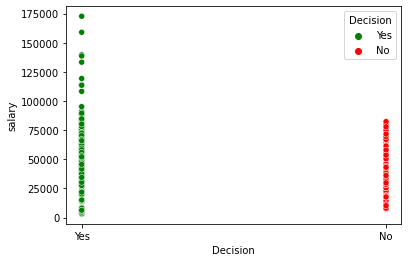

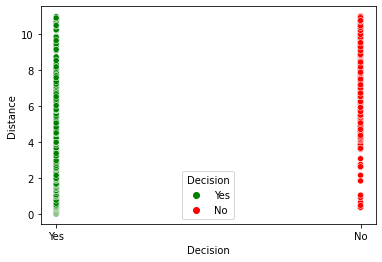

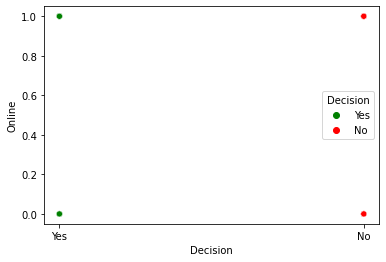

In [121]:
pali = ['g','r']

for feature in features:
    sns.scatterplot(data=NOPrediction, x='Decision', y=feature, hue='Decision',palette=pali)
    plt.show();

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!

In [ ]:
#lol is there a way to 'align' all the plots? because of varying length ylabels, esp text and
#longer digit ones, that makes them all different! also we coulda put decision on y, which
#woulda been more intuitive

In [ ]:
#LOL so you see for Gender & Online, since they're also binary like Decision,
# ONLY HAVE 4 CORNERS OF POINTS!!!

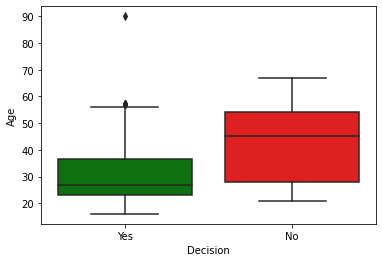

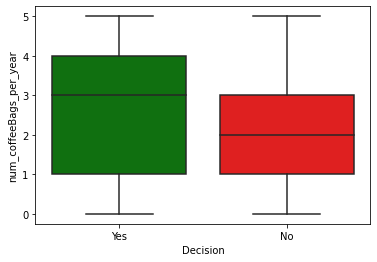

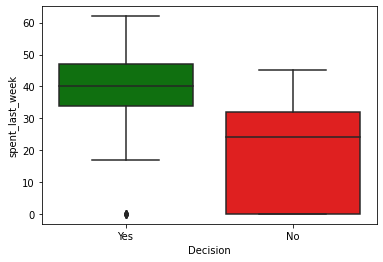

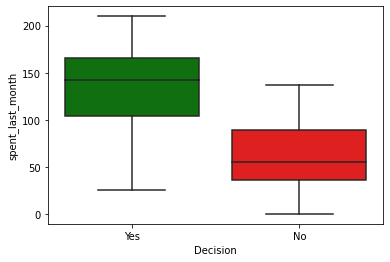

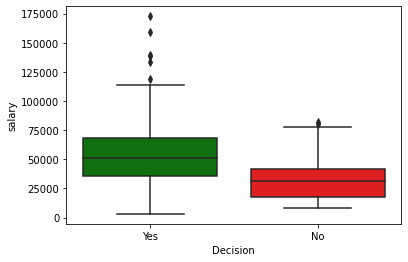

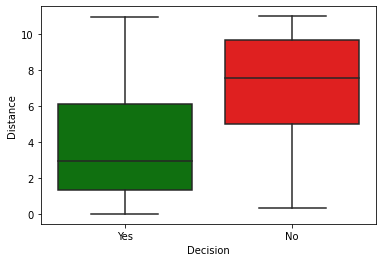

In [158]:
#now let's do boxplot version, which will be much cleaner & easier to interpret!
#cuz this just shows where values exist but so much overlap that you can't appreciate; can only
#tell when/where something is more SPARSE!

#but needa tweak features to only include CONTINUOUS ones!!! OTHERWISE WILL ERROR!!!!

pali = ['g','r']

features_cont=['Age', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance']

for feature in features_cont:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();

In [ ]:
#(make sure this is rerun cuz i think i tweaked when i realized don't need
#'hue' to run, but then realized it's still better to cuz looks real nice w/
#the AUTOLEGEND!!!)

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!!
#MUCH BETTER/EASIER TO INTERPRET

#so this story tells us that, ppl who indicated they would buy the new coffee seem to be:
#(keep in mind that this is based on the CUT dataset where we GUTTED OUT the NaN-Decisioners!!!
#even though ALL THE OTHER FEATURE DATA WAS THERE!!!!)
    #younger
    #already buy more coffee from you
    #recently bought coffee from you/spent more
    #MAKE more money (lol aka HAVE more money to spend!)
    #and live CLOSER to the head/home office/HQ!!!
    #and from below, we also see that in general, simply MORE ppl are indicating they DO wanna
        #try than DON'T! which oh yeah he did say 70% right!? OHH wait no - he said that's the
        #THRESHOLD THEY NEED/WANT - preliminarily - to decide whether to move forward
        #but wait that's INDICATED... so... are we keeping that SEPARATE from *PREDICTED* WHETHER
        #THEY WILL OR NOT!?
        #we're at 64% right now...
        #so wait... oh i guess the 70% was what they decided before doing the surveys/getting
        #the results. but now we see that it's below, so... like SHOULDN'T THAT HAVE BEEN THE
        #VERY FIRST THING THEY LOOKED AT!?!?!?
        #lol cuz doesn't this mean we can scrap the whole concept right off the bat?!?! kill it??
        #or is it close enough that now we can look at other data/indications to make the final decision?

        #interesting / good to know - so there's right around same number of men & women;
        #a few more women. but there's a noticeable more number of #men that indicated yes than
        #women! and VERY noticeably higher PROPORTION of men (ie, compared to other men/within men,
        #ie percentage of men) COMPARED TO PROPORTION OF WOMEN!!! women are creeping up neck-n-neck
        #on yes/no / split! while men show a clear favor FOR!
        #would be good to normalize within

    #and also - interestingly - only SLIGHTLY more who indicated yes have purchased something
    #online before! which is kind of concerning... that either data is unreliable/wrong
    #or ppl are really full of themselves lol
    #and the No's indicated are IDENTICAL for BOTH! online buyers and non!

    #ppl aren't good judges of themselves
    #lol THERE'S AN IDEA! instead of surveying PEOPLE about what they would do, have THEIR
    #FRIENDS & FAMILY indicate for them!!!! anonymously take surveys on their behalf and get
    #paid for them!!!
    #note we'd also wanna maybe normalize for within group thing here for binaries


In [132]:
#~equal men/women customers
NOPrediction.Gender.value_counts(normalize=True)

Female    0.508439
Male      0.491561
Name: Gender, dtype: float64

In [130]:
NOPrediction.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [131]:
coffeeData.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [ ]:
#oh okay so even w/ the nans, it's still only counting pct based on ACTUAL VALID ANSWERS!!!
#NOT COUNTING BLANKS! *CUZ YOU CAN'T "COUNT" SOMETHING THAT'S *NOT THERE*!!!!!!!!

In [124]:
#confirm the binary/discrete/categorical features are the ones we took out!
set(features) - set(features_cont)

{'Gender', 'Online'}

In [126]:
type(set(features) - set(features_cont))

set

In [125]:
list(set(features) - set(features_cont))

['Gender', 'Online']

In [8]:
#oh yeah! there's .difference() too!

features.difference(features_cont)

AttributeError: 'list' object has no attribute 'difference'

In [ ]:
#oh lol, only works for DICTS??
#although ironic cuz output of SET is curly braces so LOOKS like a dict!!

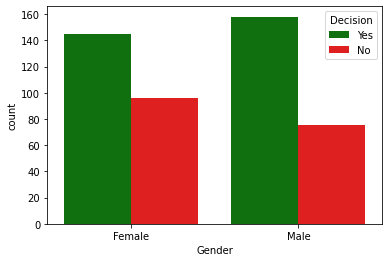

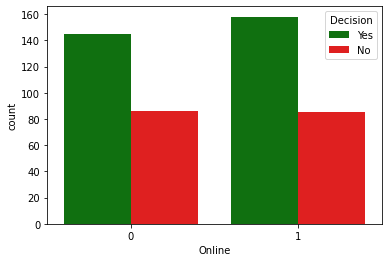

In [128]:
#OH! and then we can show the BINARY ones w/ a diff way! simple bar charts!

binary_features = list(set(features) - set(features_cont))

for binary_feature in binary_features:
    sns.countplot(data=NOPrediction,x=binary_feature, hue='Decision', palette=pali)
    plt.show()

In [140]:
#3. Okay PHEW! Can finally move on! >:P (panting lol) / outta breath!

#get the BALANCE of the dataset, aka save the ones that we SHAVED OFF!!! keep em contained in/as
#their OWN df!

#why didn't they say to do this at the time of saving the CLEANED!
#so yeah we split the original into the cleaned (NOPrediction)/keepers and the fat/removed/trash
#(Prediction)

#let's first explore / make sure it looks right
# Prediction = 
coffeeData[coffeeData['Decision'].isnull()]

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,0,52,55227,5.984716,0,NaN
677,67,Male,5,41,151,182058,6.288700,1,NaN
680,24,Female,5,62,205,55772,6.583449,1,NaN
682,33,Female,5,34,96,78058,6.723241,0,NaN


In [ ]:
#yep! Decisions are all missing!/nanas/naans lol

In [141]:
Prediction = coffeeData[coffeeData['Decision'].isnull()]

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,0,52,55227,5.984716,0,NaN
677,67,Male,5,41,151,182058,6.288700,1,NaN
680,24,Female,5,62,205,55772,6.583449,1,NaN
682,33,Female,5,34,96,78058,6.723241,0,NaN


In [142]:
#restore point!

NOPrediction_backup = NOPrediction.copy()

In [144]:
#4. split into X & y

#NOPrediction, that is

#gotta do this first, aka dividing/separating X & y remember! in order
#to do train test split!

X = NOPrediction.drop('Decision',axis=1)
y = NOPrediction.Decision


In [145]:
X

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
0,36,Female,0,24,73,42789,0.003168,0
2,24,Male,0,39,119,30563,0.916005,1
4,24,Female,0,20,36,14244,0.965881,0
5,20,Female,0,23,28,14293,1.036346,1
6,34,Female,0,55,202,91035,1.134851,0
...,...,...,...,...,...,...,...,...
696,29,Female,5,20,74,29799,10.455068,0
697,45,Female,5,61,201,80260,10.476341,0
698,54,Male,5,44,116,44077,10.693889,1
699,63,Male,5,33,117,43081,10.755194,1


In [146]:
y

0      Yes
2      Yes
4      Yes
5      Yes
6      Yes
      ... 
696     No
697    Yes
698     No
699     No
701    Yes
Name: Decision, Length: 474, dtype: object

In [225]:
X_train.shape

(355, 8)

In [167]:
#5. dummys! dum dums

#so not sure if wants us to save like the dummys by THEMSELVES or have it do ALL IN ONE *FOR US*!!?
#gonna take my chances! initiate respawn point! lol

# NOprediction_dum = pd.get_dummies(NOPrediction, columns = binary_features, drop_first=True)

# NOprediction_dum

#can JUST do it on X, and resave that as X
#or if do on WHOLE that includes y, have to resave X from this
#so first option/their option will be 'cheaper' *OH NO I'M STARTING TO
#TALK LIKE THEM!!!!!! #ghostfaceawe/shock emoji lol

X_dum = pd.get_dummies(X, columns = binary_features, drop_first=True)

X_dum


,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Gender_Male,Online_1
0,36,0,24,73,42789,0.003168,0,0
2,24,0,39,119,30563,0.916005,1,1
4,24,0,20,36,14244,0.965881,0,0
5,20,0,23,28,14293,1.036346,0,1
6,34,0,55,202,91035,1.134851,0,0
...,...,...,...,...,...,...,...,...
696,29,5,20,74,29799,10.455068,0,0
697,45,5,61,201,80260,10.476341,0,0
698,54,5,44,116,44077,10.693889,1,1
699,63,5,33,117,43081,10.755194,1,1


In [ ]:
#BEAUTIFUL!!!!!! ALHAMDULILLAHI RABBIL 'AALAMEEN!!!! IT WORKED EXACTLY AS WE WANTED!!!
#THE TWO CATS WERE BINARY, THUS DROPPING FIRST [0 CASE!] LEFT ONLY THE ONE/*1* CASE!!! lol literally

In [ ]:
######################
#BUT WAIT A MINUTE!!!!!! IF THESE CATEGORIES ARE *ALREADY* BINARY...
#THEN WHY DO WE NEED TO DUMMIFY?!?!?! CUZ JUST TAKES US FROM 2 COLUMNS
#TO A DIFF 2 COLUMNS!!!
#ohhh, well, for GENDER at least, it's text, so that one we need to,
#although we could've pretty much just as easily converted male/female
#to 1/0!!!
#and NOTE!!!!! it's NOT going to TWO columns!!! cuz it's CUTTING OFF
#THE LAST, or *second/other* ONE IN THIS CASE CUZ OF ODD-MAN-OUT!!!
#process of elimination!!! last man standing!!! "musical chairs" lolll
######################

In [168]:
#6. Okay **NOW** WE'RE READY TO TRAIN/TEST/SPLIT!!! MAKES MORE SENSE THIS WAY YEAH!

#remem the order of these simply by 'Train/Test'! and you know X goes first! (X,y)!
#plus ALPHABETICAL!

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=246)
#had to go ahead n scroll thru to see what settings they wanted to make sure i didn't have to
#do this again!/do another version! wanted random state. why the heck 246?! at least pick a two digit number...
#in fact...WHY DOESN'T ANYONE EVER PICK *ONE* DIGIT NUMBERS!? or is minimum like/starting at 10/11?

#ALSO THEY WASTE SPACE/REDUNDANT BY SPECIFYING THE TRAINING SIZE TO .25 WHEN THAT'S ALREADY THE DEFAULT!!!
#^v^#


In [169]:
X_train

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Gender_Male,Online_1
410,28,3,39,143,77037,6.413463,0,0
257,34,2,0,0,10488,4.583791,1,1
141,28,1,44,127,38682,5.526281,1,1
617,17,5,45,145,5714,1.487491,0,1
424,25,3,38,107,34859,7.261594,0,1
...,...,...,...,...,...,...,...,...
326,24,3,24,91,28140,0.155711,0,1
523,23,4,41,148,59993,4.815908,0,1
179,24,1,40,145,75728,9.459375,0,0
209,27,2,20,20,30192,0.910008,1,0


In [171]:
y_train

410    Yes
257     No
141    Yes
617    Yes
424    Yes
      ... 
326    Yes
523    Yes
179    Yes
209     No
609    Yes
Name: Decision, Length: 355, dtype: object

In [ ]:
#yeffffff!
#Alhamdulillah!

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [148]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NOPrediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,5.102898,0.512658
std,13.604135,1.585211,15.758109,56.101085,25567.674430,3.354891,0.500368
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,2.077965,0.000000
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,4.832168,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,7.869086,1.000000
max,90.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000


In [152]:
#oh! notice gender is missing cuz it's *TEXT* AND NOT NUMERICAL!
###############################################################################################

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

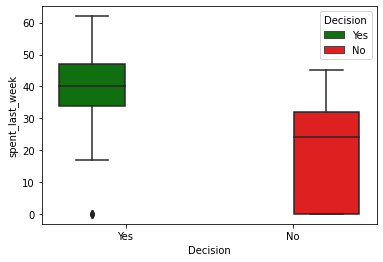

In [159]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week

#done

#oh wait lol, they're asking for something EASIER! aka NOT hued on decision:
#NOTE!!!! when X *IS* decision then we DON'T NEED HUE!!! just put in palette!!!
#BUT THEN THE ONLY DIFF IS YOU WON'T GET THAT NICE *LEGEND*!!!!
#so aH we DID do naturally what they wanted w/o even knowing/looking! lol
# 'PASSING THE UNSEEN TEST'! :P

sns.boxplot(data=NOPrediction, x='Decision', y='spent_last_week', hue='Decision', palette=pali);

Can you admissibly conclude anything from this boxplot? Write your answer here:



Answer:

Those who indicated that they will buy the potential new product spent significantly more last week than those who indicated they *wouldn't* buy the product. Moreover, those of the latter group have a **MUCH** larger range of spending, being towards the *very low* end

There's a nice line of separation between the 25th of Yes & 75th of No!

In [214]:
#lol whoops - moved too fast/multitasked/made wrong assumptions, misread; didn't follow their
#instructions lol did wrong thing at first here - see next for right!

# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 

#interesting - NOW they're saying to do hue! lol

# sns.boxplot(data=NOPrediction, x='Decision', y='spent_last_month', hue='Decision', palette=pali);

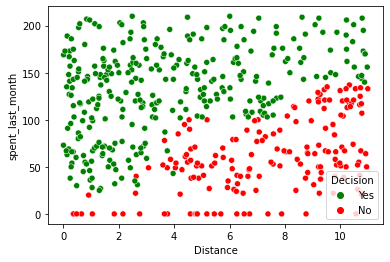

In [213]:
#they DID want distance - i just thought it was a typo
#since i got an error when i put distance, but that's cuz they wrote it w/ lowercase here (bane/fuel2fire)
#but the actual column is spelled w/ capital D
#also though i thought it was an error cuz above they SPECIFICALLY SAID TO PUT *DECISION* AS
#THE X!!!!! anwi that's what i get for following their rules and being a good student, or bad lol,
#for going ahead and doing things on my own by actually THINKING THROUGH aH and not simply
#be fed the answer, hand-held/spoon-fed!

#ORIGINAL INSTRUCTIONS! LOL:
#Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 

#OHHH shoot - the other thing i didn't pay attention to - THEY WANT A *SCATT*!!! lol

sns.scatterplot(data=NOPrediction, x='Distance', y='spent_last_month', hue='Decision', palette=pali);

In [ ]:
#############################################################################
###SUBHANALLAH!!!!!!!! VERY INTERESTING!!!!!! OKAY THIS MAKES ALOT MORE SENSE ON
#WHY THEY WANTED US TO LOOK AT THIS!!!!!!
#############################################################################

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

Clearly we have a nice diagonal decision boundary, however, decision trees don't do well
with making diagonals since they can only work with 'straight lines' aka AXIS-SPLITS! it can
still be done but will require many divisions!

But conceptually, EITHER living close to head office OR having spent much in the last month are good indicators of intent to buy the product of interest. Note that distance's relationship is INVERSE, i.e. a LOWER value for distance (i.e. CLOSER) is correlated with high intent to buy

So together this means that living close, even if didn't spend much, was likely to inidicate that they would buy, and those who spent alot, even if they don't live close, did the same. The more we go into these positive extremes, the more likely! Thus, those who both live close AND spend a lot OVERWHELMINGLY, in fact, UNANIMOUSLY, with the data we had left after cleaning, indicated intent to buy the new product! Intuitively these make sense, so it passes the sanity check.

We can confirm these individual correlations by looking at their box plots below (taken from above/earlier). For spending last month, there's a clear divide, just like above with spending last week. With distance, there's not as clear of a divide, but it's close!

It's no surprise that we see later that (at least in the first model), the first split is on spent_last_month and second is on distance! And then these two re-occur throughout the tree depth! Makes sense since we see a DIAGONAL separation - because we'd have to keep 'weaving' back and forth along perpendicular axis splits to attain a diagonal, like a pixely image! The first split is @ $138 which does go straight to the heart of the dist and the separation, so that is a very good place to start to SPLIT and eliminate as much swaths of the dist as possible! Things that eliminate approximately 50% of the dist are the best ways to start! Like we know from the game 21 Questions

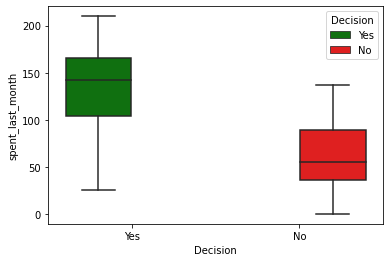

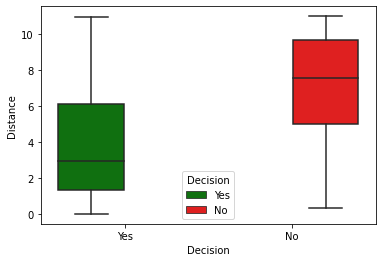

In [216]:
features_focus=['spent_last_month', 'Distance']

for feature in features_focus:
    sns.boxplot(data=NOPrediction, x='Decision', y=feature, hue='Decision', palette=pali)
    plt.show();

In [ ]:
#lol wow! so my plot DID turn out to be useful after all!!!

In [215]:
#lol original answer when did the WRONG plot! ;P above
# Again, very significant difference!!! Yes's median spending last month almost 3x more than Non's! But this time IQR is about the same, maybe little more w/ Yes's. But *FULL RANGE* is much greater w/ Yes's this time

# Again there's a nice line of separation between the 25th of Yes & 75th of No! For Decision Tree split criteria

In [239]:
X_train[y_train=='No'].spent_last_month.max()

137

In [241]:
X_train[y_train=='Yes'].spent_last_month.median()

143.0

In [257]:
NOPrediction[NOPrediction['Decision']=='Yes'].spent_last_month.median()

142.0

In [270]:
# X_train.append(y_train)

In [272]:
# pd.concat([X_train,y_train])

In [274]:
trainers = X_train.copy()
trainers['Decision']=y_train
trainers.head()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Gender_Male,Online_1,Decision
410,28,3,39,143,77037,6.413463,0,0,Yes
257,34,2,0,0,10488,4.583791,1,1,No
141,28,1,44,127,38682,5.526281,1,1,Yes
617,17,5,45,145,5714,1.487491,0,1,Yes
424,25,3,38,107,34859,7.261594,0,1,Yes


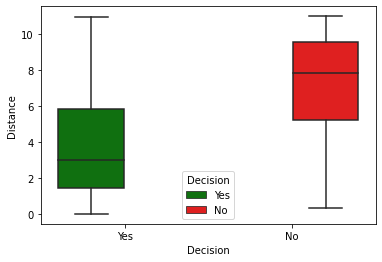

In [276]:
sns.boxplot(data=trainers, x='Decision', y='Distance', hue='Decision', palette=pali);


In [14]:
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [16]:
pali_numer = ['r','g']
#lol didn't wanna go thru running the WHOLE notebook so just did a quick remake
#of NOPrediction, so decision is still 0/1 instead of No/Yes. but for some reason,
#when did no/yes, the order was yes/no, so did pali = ['g','r'], but w/ 0/1, it does
#order of 0/1, so hadda flip it to ['r','g']?

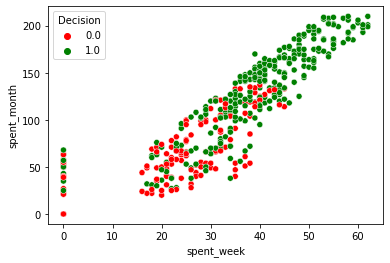

In [17]:
#as far as scatterplots, what else might there be?? check the other features with
#little overlap on the decision breakouts! #AND *NOTE* you can ignore the
#WHISKERS and just look at the BULK, aka the BODY/TORSO/MIDSECTION, aka the IQR!!!
#if there's little to no overlap there YOU'RE STILL GUCCI!

#so we'd wanna find all the features that have little/no overlap in their
#IQR/boxplots, and then pair em together in every combo as a scatterplot!
#so there's spentlastmonth, spentlastweek, salary, distance, age
#is there a way to do like a 'parameter matrix/grid' to make sure it chooses/
#cycles thru every combo!? or have to do like a nested for loop? or enumerate?

sns.scatterplot(data=NOPrediction, x='spent_week', y='spent_month', hue='Decision', palette=pali_numer);

################################################################

In [ ]:
#ahhhh interesting! so yeah, like we said, THESE TWO ARE PROBABLY/EXPECTEDLY
#HIGHLY CORRELATED!!! if you spent more last week, you probably spent more
#last MONTH! in some cases, last week WAS last month LOL!
#the separation you see is like the same you see in either ONE of them
#individually! aka the more you spent, the more likely you were to indicate Yes!

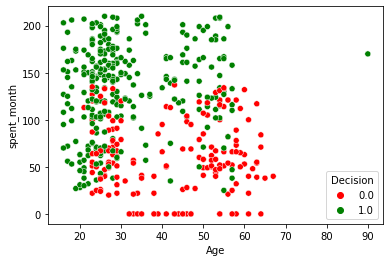

In [19]:
sns.scatterplot(data=NOPrediction, x='Age', y='spent_month', hue='Decision', palette=pali_numer);

In [ ]:
#hmm interesting! it's like an upside down 'L' shape! like square within a square!
#<age 23 & >$138 spent last month said Yes!!!

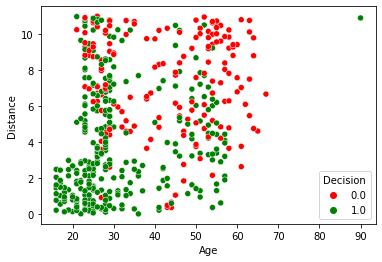

In [20]:
sns.scatterplot(data=NOPrediction, x='Age', y='Distance', hue='Decision', palette=pali_numer);

In [ ]:
#hmm interesting! like another L shape, but actually, mostly just the lower
#left block said yes! you can box that up w/ only a few exceptions!
#young & close!!!
#the youngest ALL said yes, and the closest ALMOST all said yes!!!
############################################################################

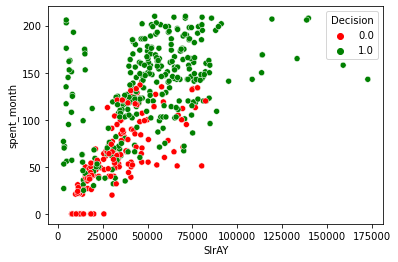

In [22]:
sns.scatterplot(data=NOPrediction, x='SlrAY', y='spent_month', hue='Decision', palette=pali_numer);

In [ ]:
#okay so another 'L', the PISTOL FIGURE!!! so, from bottom left/origin,
#like angling up and right, then SHARP right turn lol, so basically, ENTIRE TOP block,
#without exception, so >$138 spent, *ALL* income brackets, regardless of how rich
#or poor, said yes! ppl are mostly in the 25k to 80k range to begin with;
#and then beneath that spenditure, interestingly it's the ones who make the LEAST
#that said yes!!! makes sense tho that the less they make, the less they tend
#to spend. lot of mixing, but the LOWEST earners said yes REGARDLESS OF HOW
#MUCH THEY SPENT! seems a little strange that even those who didn't spend anything
#in the last month were saying they would - but it was a mix; but as expected,
#it was more common to say NO then yes for the low SPENDERS, but perhaps
#more common to say yes than no for low EARNERS!!! but yeah, interestingly the
#LOWEST spenders said yes!? too happy-go-lucky lol

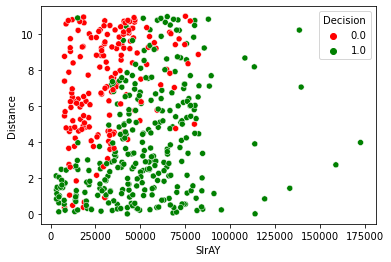

In [23]:
sns.scatterplot(data=NOPrediction, x='SlrAY', y='Distance', hue='Decision', palette=pali_numer);

In [ ]:
#okay cool - pretty good division! NE/SW line! would have to do a pixely
#jagged back n forth chisel, up/right up/right lol TO BE UPRIGHT! upward & onward
#but everyone >$85k salary, without exception, said yes. and then that block/box
#to low-left of that line, like down to $35k salary and up to 4.1miles distance!

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [ ]:
# Get just those rows whose value for the Decision column is null  
#done

In [162]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


### 4. Divide the NOPrediction subset into X and y

In [ ]:
# Check the names of the columns of NOPrediction
#done

In [ ]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
#lol NO NEED! just DROP decision!

# Make an explanatory variable called X, and assign it: NoPrediction[features]
#done

# Make a dependent variable called y, and assign it: NoPrediction.Decision
#done 

### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [ ]:
# One-hot encode all features in X.
#done

In [ ]:
#WOOOOOOOOOOOOW they messed up the instructions in the beginning!!!!!!
#the ones i went off of!!!!!
#man i shoulda realized
#they said do the train/test split BEFORE dummifying! combined train/test
#w/ the just dividing up into X & y!!!
#so now i gotta redo!!!
#thought something was off!!!
#i fixed it here

### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [ ]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
#done

# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [ ]:
#bruhhhh. the entropy model was LITERALLY the ONE that they didn't
#talk about AT ALL in the one video! they didn't even give us an equation
#for it!!!!

In [173]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
#ohh k dang they're tryna be tricky but i guess just not spoon feed. don't
#LITERALLY put that in, but rather how we always do! and gotta import
#too!:

from sklearn.tree import DecisionTreeClassifier
entr_model = DecisionTreeClassifier(criterion='entropy')
#max_depth default is None which is what we want!

# Call fit() on entr_model
entr_model.fit(X_train,y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#lol what was the point of 'checking our model'??

In [174]:
# Call Series on our y_pred variable with the following: pd.Series(y_pred)

y_pred

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [175]:
pd.Series(y_pred)

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
114    Yes
115    Yes
116     No
117     No
118    Yes
Length: 119, dtype: object

In [ ]:

#AND WHAT WAS THE POINT OF THIS?? looked better in RAW original form anyway!!!
#at least you could see it all!
#keep it NATURAL! don't try to alter it to be somebody else!
#but still - only way you can even make sense of it is w/ summary/visual aid! in *VISUAL STUDIO*!

In [176]:
#and anyway,... WHAT WE REALLY WANT IS THE *RESULTS* AKA *SCORE*!!!

entr_model.score(X_test,y_test)

0.9915966386554622

In [219]:
#WHOAAAARRRR!!!! DID WE REALLY DO THAT GOOD?!? OR AM I TRIPPIN?!
#lol did i ruin/cross contaminate it?!? accidentally spoiler alerted it?!
#i did do on TEST and not on TRAIN!!
#in fact, lol, let's see:
entr_model.score(X_train,y_train)

1.0

In [ ]:
#####################################################################################
#OHHHHH DAANNNNNNNNGGGGGG DANIYAALLLL!!!!! sA so IT ACTUALLY DID COMPLETELY OVERFIT!!!
#YET, DIDN'T SEEM TO BE AN ISSUE CUZ STILL GOT AMAZING SCORE!!!! sA!!!!! DIDN'T EVEN DO
#OTHER TREES/ENSEMBLE/FOREST!!!!! no tweakers/averaging!!!! is this just a really easy case!?
#so THAT'S WHY ENTROPY WAS 0 IN EACH LEAF/FINAL BUCKET!!!
#####################################################################################

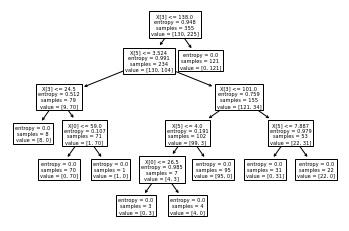

In [206]:
#plain vanilla
from sklearn import tree
tree.plot_tree(entr_model);

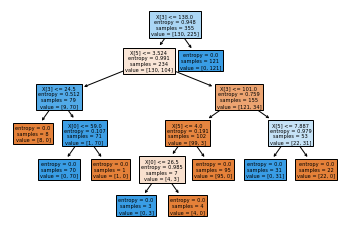

In [181]:
# Now we want to visualize the tree
from sklearn import tree
tree.plot_tree(entr_model,filled=True);


In [ ]:
#nice alhamdulillahi Rabbil 'aalameen!

#ohh okay so atleast if you do filled that'll give it some COLOR!/cullah!

#stay tuned ahead! for more customizable / visually friendly way!

In [194]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [198]:
X_dum.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Gender_Male', 'Online_1'],
      dtype='object')

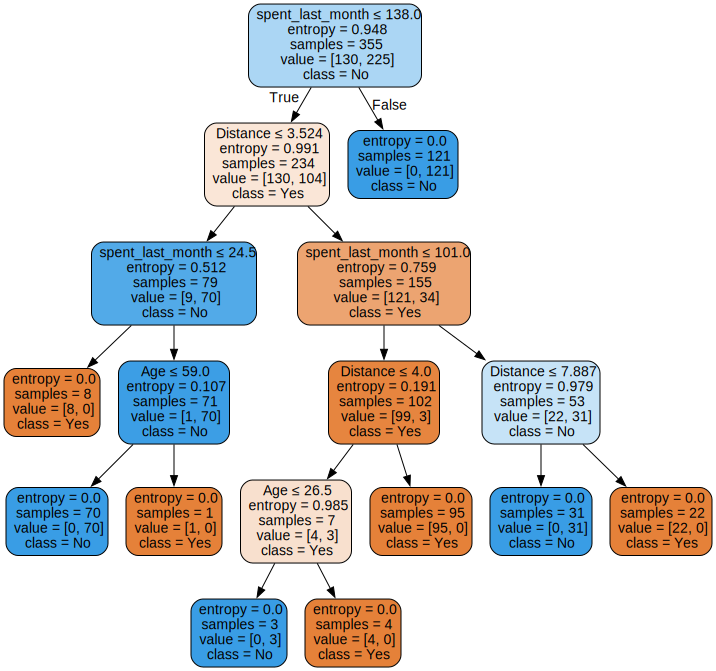

In [203]:
import graphviz
coffee_tree = tree.export_graphviz(entr_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(coffee_tree)
graph

#LOL! coffee tree! is it a tree tho?? :P

In [204]:
graph.render("coffee")

'coffee.pdf'

In [183]:
#pip install graphviz

#successful

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#then did brew install graphviz in terminal tf_m1 and that worked there and THEN
#ALHAMDULILLAH things started working here!

In [185]:
#conda install python-graphviz
#unsuccessful :/


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/osx-arm64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/osx-arm64'



Note: you may need to restart the kernel to use updated packages.


In [207]:
# We can do so with export_graphviz


# Alternatively for class_names use entr_model.classes_
entr_model.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
#OHH NICE TIP!! HOW'D IT KNOW!? what the classes were?? i guess from the y that's stored to it?

In [279]:
X_dum.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Gender_Male', 'Online_1'],
      dtype='object')

In [281]:
from sklearn.tree import export_text
text_tree = export_text(entr_model.fit(X_train,y_train))#, feature_names=X_dum.columns) >> for some reason won't take this here, but worked in graphviz!?
text_tree

'|--- feature_3 <= 138.00\n|   |--- feature_5 <= 3.52\n|   |   |--- feature_3 <= 24.50\n|   |   |   |--- class: No\n|   |   |--- feature_3 >  24.50\n|   |   |   |--- feature_0 <= 59.00\n|   |   |   |   |--- class: Yes\n|   |   |   |--- feature_0 >  59.00\n|   |   |   |   |--- class: No\n|   |--- feature_5 >  3.52\n|   |   |--- feature_3 <= 101.00\n|   |   |   |--- feature_5 <= 4.00\n|   |   |   |   |--- feature_0 <= 26.50\n|   |   |   |   |   |--- class: Yes\n|   |   |   |   |--- feature_0 >  26.50\n|   |   |   |   |   |--- class: No\n|   |   |   |--- feature_5 >  4.00\n|   |   |   |   |--- class: No\n|   |   |--- feature_3 >  101.00\n|   |   |   |--- feature_5 <= 7.89\n|   |   |   |   |--- class: Yes\n|   |   |   |--- feature_5 >  7.89\n|   |   |   |   |--- class: No\n|--- feature_3 >  138.00\n|   |--- class: Yes\n'

In [ ]:
#so i guess don't know if there's much use to seeing the text form lol if we can get the nice
#graphic! plus, w/ this error that doesn't let us get the feature names,... even worse

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [218]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "No"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


In [ ]:
#COME ON GUYS! this is that issue we noted above. BE CONSISTENT! DOUBLE CHECK FOR THESE CARELESS
#MISTAKES! wrote caps in one place then reg in other, which i went w/, then now caps again.
#so i changed them here to my preferred Regz! (only first letter capped)

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!! This accuracy is exactly what i got when i ran
#.score()!!!

#nice layout!

#cool to see that you can get the diff scores like this!

#is there like a 'classification report' equiv that gives you all?

#oh wait - how does it know we're talking about THIS model if it's never referenced here??
#only say 'metrics'??? just assumes it's whatever thing we did last from the library??
#OHHH, well, it's just going based off of y_test & y_pred!!! so whatever you have saved for/to
#those!!!!!

What can you infer from these results? Write your conclusions here:

Extremely good results all across the board! Even though we just did a regular, single Decision Tree which would normally mean we overfit - and literally our trained model tree captured every point perfectly - but the relationship was just so clear here, and maybe we got a bit of luck with well-behaved, consistent data without many outliers, that we got a near perfect score! Normally we'd need to AT LEAST do pruning, if not do SEVERAL trees/bootstrapping/bagging/Random Forest/averaging of many models etc to avoid overfitting, so it's pretty remarkable we got these results without any of that!

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [221]:
gini_model = DecisionTreeClassifier() #default is gini!
#max_depth default is None which is what we want!

# Call fit() on gini_model
gini_model.fit(X_train,y_train)

# Call predict() on gini_model with X_test passed to it, and assign the result to a variable y_pred 
y_predg = gini_model.predict(X_test)
#>>REALLY NO NEED FOR THIS IF WE'RE JUST GETTING SCORE ANYWAY!!?
#oh it comes into play later just w/ the way they get the score metrics

gini_model.score(X_test,y_test)

0.9831932773109243

In [ ]:
#noyce! not as good!

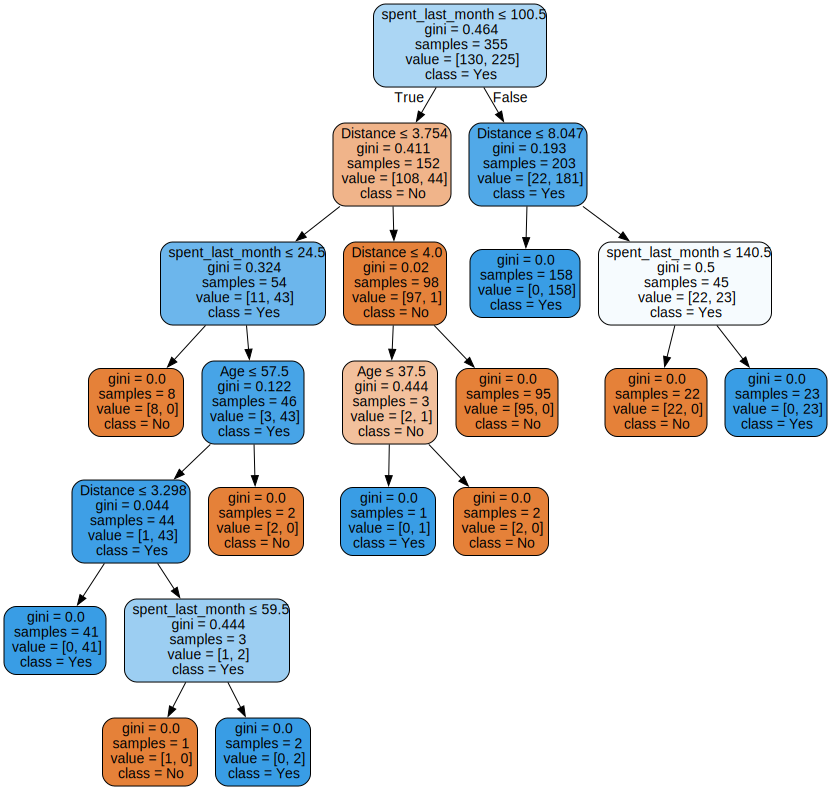

In [223]:
coffee_treeg = tree.export_graphviz(gini_model, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg = graphviz.Source(coffee_treeg)
graphg

In [240]:
graphg.render('coffee_tree_geenee')

'coffee_tree_geenee.pdf'

In [282]:
from sklearn.tree import export_text
text_treeg = export_text(gini_model.fit(X_train,y_train))#, feature_names=X_dum.columns) >> for some reason won't take this here, but worked in graphviz!?
text_treeg

'|--- feature_3 <= 100.50\n|   |--- feature_5 <= 3.75\n|   |   |--- feature_3 <= 24.50\n|   |   |   |--- class: No\n|   |   |--- feature_3 >  24.50\n|   |   |   |--- feature_0 <= 57.50\n|   |   |   |   |--- feature_5 <= 3.30\n|   |   |   |   |   |--- class: Yes\n|   |   |   |   |--- feature_5 >  3.30\n|   |   |   |   |   |--- feature_0 <= 26.50\n|   |   |   |   |   |   |--- class: Yes\n|   |   |   |   |   |--- feature_0 >  26.50\n|   |   |   |   |   |   |--- class: No\n|   |   |   |--- feature_0 >  57.50\n|   |   |   |   |--- class: No\n|   |--- feature_5 >  3.75\n|   |   |--- feature_5 <= 4.00\n|   |   |   |--- feature_5 <= 3.91\n|   |   |   |   |--- class: No\n|   |   |   |--- feature_5 >  3.91\n|   |   |   |   |--- class: Yes\n|   |   |--- feature_5 >  4.00\n|   |   |   |--- class: No\n|--- feature_3 >  100.50\n|   |--- feature_5 <= 8.05\n|   |   |--- class: Yes\n|   |--- feature_5 >  8.05\n|   |   |--- feature_3 <= 140.50\n|   |   |   |--- class: No\n|   |   |--- feature_3 >  140.5

In [ ]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
#done

# Call fit() on the gini_model as you did with the entr_model
#done

# Call predict() on the gini_model as you did with the entr_model 
#done

# Turn y_pred into a series, as before
#lol bin

# Check out gini_model
#DEF bin!

In [ ]:
# As before, but make the model name gini_model

#umm, did they mean to say make the graphviz? cuz did that!

# Alternatively for class_names use gini_model.classes_
#did!

In [287]:
# Run this block for model evaluation
print("Model Gini impurity model") #add / clarify "no max depth" like case0?
print("Accuracy:", metrics.accuracy_score(y_test,y_predg))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg))
print('Precision score' , metrics.precision_score(y_test,y_predg, pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_predg, pos_label = "No"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


In [ ]:
#got above too! for accura

In [ ]:
#why are their metrics different every time?? for every model?

How do the results here compare to the previous model? Write your judgements here: 

Well, here, we didn't break it down as much into yes/no. But it's still amazing, very slightly lower accuracy & precision. Same exact recall score! But these are so close that I'm not even sure they're statistically significantly different!

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [ ]:
#limiting the depth will kind of like a way of 'preemptively' pruning it, aka by making sure
#it doesn't get too deep in the first place! aka doesn't get too OVERFIT! even tho, as we saw,
#even PERFECT overfit didn't seem to be a problem!

#lol @ ^'hitherto', nice

#ohh okay, so we're not gonna actually do RSkCV here, just gonna start w/ limiting depth to 3,
#meaning 3 levels of decisions/for the tree

In [288]:
entr_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

entr_model2.fit(X_train,y_train)

entr_model2.score(X_test,y_test)

0.907563025210084

In [ ]:
#oh,... so we got worse?

In [290]:
#oh and we do needa do their y_pred just to run their code block later on performance....
y_pred_e2 = entr_model2.predict(X_test)

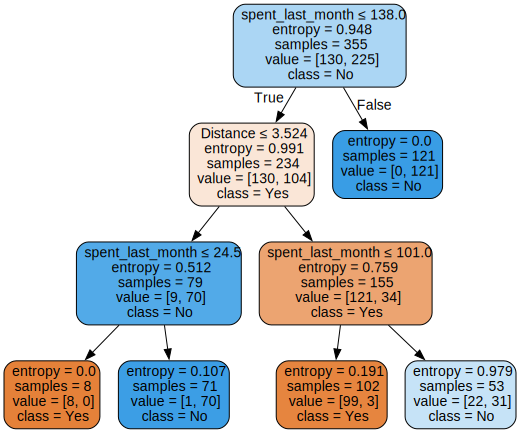

In [289]:
coffee_tree_e2 = tree.export_graphviz(entr_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=y.unique(),#>>OR entr_model.classes_!!!! gives exact same thing!
                     filled=True, rounded=True,  
                     special_characters=True)
graph_e2 = graphviz.Source(coffee_tree_e2)
graph_e2

In [ ]:
#okay aH so yeah i guess this is 3 levels of decisions! tree depth of 3!
#note that it's 4 'levels' from the look of it, but you gotta look at the 'GAPS'! like it's
#3 sets of DECISIONS!

#btw, in unrestricted aka NO max depth specified, we had a depth of *6*, for
#gini, aka 7 'apparent' levels & 6 levels of *decisions*!!!
#for entropy, it was one less; depth of 5: 6 apparent, 5 decisions

In [ ]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
#done, my way lol

In [ ]:
# As before, we need to visualize the tree to grasp its nature
#done
#lol just noticed the language...spiritual lol, real 'tree hugger' ;P

# Alternatively for class_names use entr_model2.classes_
#nope
#honestly whyyyy do we do this?!? if we KNOW the classes obviously have to be yes or no!?
#i guess just sanity check, or 'paranoia' check lol, settle

In [291]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_e2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_e2))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred_e2, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred_e2, pos_label = "No"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

In this case, doing a perfect overfit like we did before (ie NOT specifying max_depth) actually worked out really nicely, which must mean that either the testing data is very similar to the training, or more likely that the relationships between the variables and the divisions are simply THAT clear and stark. As we saw, there aren't too many outliers there are some combinations of features that do create a very clear division/separation where there isn't much if ANY overlap after a certain point

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [292]:
gini_model2 = DecisionTreeClassifier(max_depth=3)

gini_model2.fit(X_train,y_train)

y_predg2 = gini_model2.predict(X_test)

gini_model2.score(X_test,y_test)

0.9747899159663865

In [ ]:
#okay better than entropy2! but still not as good as gini1!

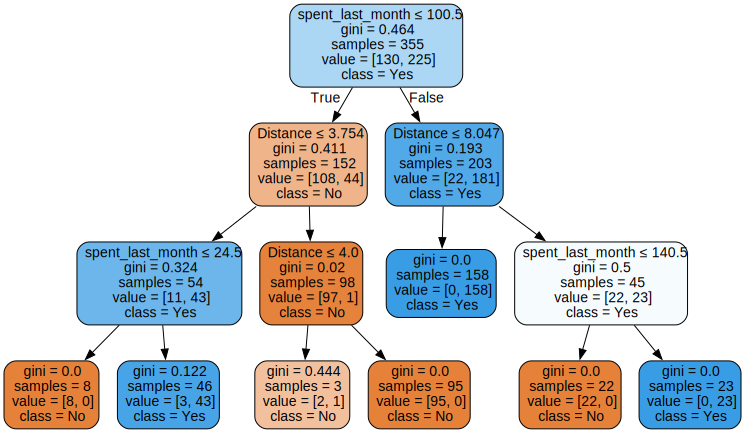

In [293]:
coffee_treeg2 = tree.export_graphviz(gini_model2, out_file=None, 
                     feature_names=X_dum.columns,  
                     class_names=gini_model2.classes_,
                     filled=True, rounded=True,
                     special_characters=True)
graphg2 = graphviz.Source(coffee_treeg2)
graphg2

In [ ]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
#done

# Do the fit, predict, and series transformations as before. 
#ohjustgoman!

In [294]:
#hain??? they don't even say anything about it??? naa before naa after??
dot_data = StringIO()

#docs: "The StringIO module is an in-memory file-like object. This object can be used as input or output
#to the most function that would expect a standard file object. When the StringIO object is
#created it is initialized by passing a string to the constructor. If no string is passed the
#StringIO will start empty. In both cases, the initial cursor on the file starts at zero."


#ohhh so i guess we don't needa worry about this - just execute it and it like formats it
#for use later?


# Alternatively for class_names use gini_model2.classes_
#exitplease

In [295]:
print("Gini impurity model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_predg2))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_predg2))
print('Precision score:', metrics.precision_score(y_test,y_predg2, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_predg2, pos_label = "No"))

#lol man annoying, why is their formatting so inconsitent/sloppy? quotes, spaces, colons, etc! on top of other issues mentioned!

Gini impurity model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

None of these numbers are higher than for the first model. But maybe what they mean when they say this is the best model is in terms of efficiency, ie for the computational 'cost', such as 'effort', time and complexity. You can say it's the best one "for the 'money' ", "pound-for-pound". It's like in regression fitting, we look at MSE, or Adjusted R2, because, even though something can literally capture more variance, it may do so with using too many variables. So these metrics assess a 'penalty' for that (by dividing by the degrees of freedom). Similarly here, if we think about it as accuracy *considering the number of levels of depth*, this is the best performer.

To be fair though, and show the other side, dissenters may say our real metric is TEST performance, and minor differences in complexity are irrelevant. In that respect, the first model undoubtedly did best, but it perhaps it was just a "lucky split," and we can compare model performance more fairly with k-fold cross-validation

In [351]:
X_train.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Gender_Male', 'Online_1'],
      dtype='object')

In [ ]:
#let's see the 'decision surface' plots!
#aka the DC scatterplots of each combo of features!

In [ ]:
# #hmmmm not sure how to do w/ this...

from sklearn.inspection import DecisionBoundaryDisplay

# # Parameters
# n_classes = 2
# plot_colors = "ryb"
# plot_step = 0.02

# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
#     # We only take the two corresponding features
#     X = coffeeData.data[:, pair]
#     y = coffeeData.Decision

#     # Train
#     gini2_fit = gini_model2.fit(X_train,y_train)

#     # Plot the decision boundary
#     ax = plt.subplot(2, 3, pairidx + 1)
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#     DecisionBoundaryDisplay.from_estimator(
#         gini2_fit,
#         X,
#         cmap=plt.cm.RdYlBu,
#         response_method="predict",
#         ax=ax,
#         xlabel=iris.feature_names[pair[0]],
#         ylabel=iris.feature_names[pair[1]],
#     )

#     # Plot the training points
#     for i, color in zip(range(n_classes), plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(
#             X[idx, 0],
#             X[idx, 1],
#             c=color,
#             label=iris.target_names[i],
#             cmap=plt.cm.RdYlBu,
#             edgecolor="black",
#             s=15,
#         )

# #lol "sup"title??
# plt.suptitle("Decision surface of decision trees trained on pairs of features")
# plt.legend(loc="lower right", borderpad=0, handletextpad=0)
# _ = plt.axis("tight")

In [25]:
#the attribute item numbers it the list of attributes? or feature/column numbers?
list(enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]))

[(0, [0, 1]), (1, [0, 2]), (2, [0, 3]), (3, [1, 2]), (4, [1, 3]), (5, [2, 3])]

In [26]:
f,g = enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]])

#hmm so how did they have 2 outputs to store this to?? diff when iterating??

ValueError: too many values to unpack (expected 2)

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee?

In [ ]:
#we can't really predict that but can predict how many have INDICATED they will lol! actual
#translation / follow-thru would be an entirely different / separate calcualtion!

Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [ ]:
#lol ACTIONS SPEAK LOUDER THAN WORDS! these are just those who INDICATED! we all know how 'trigger happy'
#ppl are to sign up for stuff or express interest and then never do anything about it!/with it!

In [296]:
#aH we did this! it was like 63-64%!
#repeat:

NOPrediction.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

In [297]:
# Call value_counts() on the 'Decision' column of the original coffeeData
#yes we can do it on the original, as we did, but will be the same cuz WON'T COUNT THE NANS!!!
coffeeData.Decision.value_counts(normalize=True)

Yes    0.639241
No     0.360759
Name: Decision, dtype: float64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee.

1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [ ]:
#ubbb... subset the prediction dataset? so that's referring to the TEST dataset. and so
#it's already split into X_test & y_test...
#and X_test, like Xtrain, ALREADY has everything except Decision... cuz that's the y we're tryna predict...

#new variable 'potential buyers'? is that supposed to be the y variable we already have?

#OHHHHHHHHH! wait, yeah i forgot - we had those 2 separate datasets!!! Prediction & NOPrediction
#so obvy NOPie lol is the one we've been working w/ cuz that HAD the data filled in, aka these
#were the ones who we HAD an indication for for buying or not, aka had a value for DECISION!

#then the NANs for Decision were all saved into Prediction...
#so i guess the idea is we're tryna predict whether those ppl would've... indicated yes or no...?
#but even if so, how would we validate/score??? if we don't have the answers???
#or are we just gonna TRUST our 'best' model? whichever was able to best predict in 'NO Prediction'???

#and then combine that dataset w/ the original ACTUAL indications and SEE IF THAT PUTS US AT/OVER
#OUR 70% THRESHOLD!!!!!?

#so right now Prediction has ALL NANs for Decision. so we're gonna sphinx off Decision and save that
# - what's left / the FEATURES - as a separate / its own dataset - new_X

#then we're simply gonna insert that into / feed that / those X's into the 'best' model
#and see what it comes up with for 'Decision'!!!!!!

#so we'll save those predictions and then add them as a column to new_X!
###############################################################################################


In [300]:
Prediction

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN
...,...,...,...,...,...,...,...,...,...
673,66,Female,5,0,52,55227,5.984716,0,NaN
677,67,Male,5,41,151,182058,6.288700,1,NaN
680,24,Female,5,62,205,55772,6.583449,1,NaN
682,33,Female,5,34,96,78058,6.723241,0,NaN


In [298]:
X_test.columns

Index(['Age', 'num_coffeeBags_per_year', 'spent_last_week', 'spent_last_month',
       'salary', 'Distance', 'Gender_Male', 'Online_1'],
      dtype='object')

In [301]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'

#ubb i did this before, called 'features' - ohh but they're prob talking about AFTER we dummified it??
# feature_cols = X_test.columns >> wrong! see below!
#oh wait lol did they make us do this so we could KEEP these columns in X for Prediction??

#OH! but Prediction remember, like NO Prediction when it started, WASN'T DUMMIFIED YET!!!!

#so that means we DO gotta use just what we already made!!!!: features!!!
#from before:
#features=['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
#         'spent_last_month', 'salary', 'Distance', 'Online']

features_cols = features

#so yeah i guess we could create new_X using this? or can do it EASIER, MY WAY! well, actually,
#way that either Springboard taught us elsewhere, or DataCamp...: #DROPITLIKEITSHOT!

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction.drop('Decision',axis=1) #we did the same thing w/ NOPrediction when we made X!



In [306]:
new_X_backup = new_X.copy()

In [307]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
#YEP! that's what i thought! just like we did w/ NOPrediction

#MAKE SURE TO OVERWRITE new_X!!! and backup current! currant. or save as something else!
new_X = pd.get_dummies(new_X,columns=binary_features,drop_first=True)
#ohh lol, THIS is where that list of column names was for!?
#oh wait no lol, cuz columns is only to specify the DUMMIE columns, aka CATEGORICALS!!!!!
#so remem, before in NOPie we made 'binary_features' for this! aka just Gender & Online!

#binary_features = list(set(features) - set(features_cont))

#lol okay so yeah, then the columns names list WAS for the first part of subsetting!

#btw, remem, it won't work the way we want without us specifying columns because only works when it's
#STRINGS!!!!! like aka normal / typical categoricals. WON'T work w/ NUMERICAL discrete/binary/categorical!!!
#so in this case it won't work w/ ONLINE! that's 0/1!

#so yeah, just gotta do exactly same as we did in/for NOPie!


In [308]:
new_X

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Gender_Male,Online_1
1,24,0,44,164,74035,0.520906,1,0
3,20,0,30,107,13166,0.932098,1,1
7,24,0,20,34,17425,1.193188,0,0
11,24,0,40,153,84803,1.655096,0,1
12,21,0,38,122,42338,1.714179,0,1
...,...,...,...,...,...,...,...,...
673,66,5,0,52,55227,5.984716,0,0
677,67,5,41,151,182058,6.288700,1,1
680,24,5,62,205,55772,6.583449,0,1
682,33,5,34,96,78058,6.723241,0,0


In [ ]:
#vunderba
#just like before

In [309]:
# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()

#okay so this is gonna be the column for the predictions!

new_X['potential_buyers'] = gini_model2.predict(new_X)

In [ ]:
#remem, we didn't train anything NEW! we just used the EXISTING model we made on the
#training data on the / to fill in the MISSINGS for Decision in/aka Prediction!

In [310]:
#okay... so war was fought, next day/morning, sunrise, dust settling... let's see how we did

new_X.potential_buyers.value_counts()

Yes    183
No      45
Name: potential_buyers, dtype: int64

In [311]:
#ohhhh! that's looking very good!
#let's put it all together!

new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts()

Yes    486
No     216
dtype: int64

In [324]:
NOPrediction.Decision.value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

In [313]:
#dope! well, guess i can't normalize this combo lol, so workaround:

( new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts() ) / (486+216)

Yes    0.692308
No     0.307692
dtype: float64

In [ ]:
#ohhhhhh shrimp! just under 70!!!!! what ever will they do!?!?!?

In [314]:
( new_X.potential_buyers.value_counts() + NOPrediction.Decision.value_counts() ) / len(coffeeData)

Yes    0.692308
No     0.307692
dtype: float64

In [ ]:
#niceage!!!

In [316]:
new_X.potential_buyers == 'Yes'

1       True
3       True
7       True
11      True
12      True
       ...  
673    False
677     True
680     True
682    False
700     True
Name: potential_buyers, Length: 228, dtype: bool

In [317]:
( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)

0.6923076923076923

In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!! okay i'll give it to ya! this is a few chars shorter than my code!
#thanks!

In [323]:
# Let's get the numbers of YES's and NO's in the potential buyers

#ohhh gotcha, so lol JUST count the yes's! makes sense - done above!

#oh but let's see how they did it lol

# Call unique() on np, and pass potential_buyers and return_counts=True 
new_X.potential_buyers.unique(return_counts=True)

TypeError: unique() got an unexpected keyword argument 'return_counts'

In [325]:
#weird... online it does confirm return counts is an arg... but doesn't recognize here...
#lol yall better recognize!!!

new_X['potential_buyers'].unique(return_counts=True)

TypeError: unique() got an unexpected keyword argument 'return_counts'

In [ ]:
#lol just in case but no!

In [328]:
new_X.potential_buyers.values

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
  

In [329]:
#maybe gotta do this??

new_X.potential_buyers.values.unique(return_counts=True)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
#weird! don't know why it won't do it...

In [331]:
new_X.potential_buyers.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#but anyway... moving on!

The total number of potential buyers is 303 + 183 = 486

In [ ]:
#that's what i did!

In [332]:
# Print the total number of surveyed people 
len(coffeeData)

702

In [333]:
# Let's calculate the proportion of buyers
#did
486/702

0.6923076923076923

In [ ]:
#matchy matchy!

In [344]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
rate = ( sum(new_X.potential_buyers == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)
pct = rate*100
"{:.2f}% of customers want to buy Hidden Farm coffee, according to our best model.".format(pct)

'69.23% of customers want to buy Hidden Farm coffee, according to our best model.'

In [ ]:
#teetertotter!

## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

In [ ]:
#lol existential cat emoji, looks like they mean that as the shocker face / ghostface i referenced earlier!

#decision trees tell you about each INDIVIDUAL case

#but we technically ALREADY MADE a decision tree lol for ourselves! for this - if >70% say yes -
#actual and predicted - then STRIKE THE DEAL!! if less/equal, THEN NO DEAL!!!!!!

In [345]:
#LOL, we should call this 'The Decision', like LeBron James

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

In [ ]:
#but wait - so it's not like a marble drop down the shutes & ladders... like for a GIVEN decision
#tree, and a GIVEN set of test data, it IS deterministic no?? like it's got a HARD, DEFINED set of
#rules right so it MUST give the SAME answers every time!!!????
################################################################################################

In [ ]:
#so let's do random forest aka an ensemble method and average a BUNCH of different overfit models?!
#let's see what AVERAGE percentage we get from SEVERAL models!! then we can much more confidently
#make a hard decision from THAT average of MANY models/simulations!!! rather than putting all our eggs
#in one basket!

### 5a. Import necessary modules

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [347]:
X_train

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Gender_Male,Online_1
410,28,3,39,143,77037,6.413463,0,0
257,34,2,0,0,10488,4.583791,1,1
141,28,1,44,127,38682,5.526281,1,1
617,17,5,45,145,5714,1.487491,0,1
424,25,3,38,107,34859,7.261594,0,1
...,...,...,...,...,...,...,...,...
326,24,3,24,91,28140,0.155711,0,1
523,23,4,41,148,59993,4.815908,0,1
179,24,1,40,145,75728,9.459375,0,0
209,27,2,20,20,30192,0.910008,1,0


In [ ]:
#k just wanted to remind myself. so it is dummified
#and ofc this had answers for Decision, aka was NOPrediction. its answers are in y_train!

In [348]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=3,random_state=33)
#oh wait! lol wow forgot - default criterion already gini!

#wait just realized - why random state for the model? we didn't do that before
#w/ any of the other models???
#OHHH! CUZ *RANDOM* FOREST RIGHT!!! LOL! so w/ random forest, it's doing like
#bootstrapping so it's gonna be different every time!!! so if you save the random
#state then it can REPLICATE those results!!!

#ohh wait! also just realized tho - i thought the idea in random forest WAS for us
#to like perfectly overfit since we're gonna be bootstrapping & averaging!?!
#so then why put a max depth??? i guess then we DON'T wanna perfectly overfit??
#but rather still do what we'd do on a normal, SINGLE decision tree??

# Model and fit
firstRFModel.fit(X_train,y_train)

#do the same thing we did before. but just use what we had, but go backwards. so needa drop off
#the added column w/ the predicts. gotta keep this column off cuz you don't want that in the feeder
#for X's to make predictions!
new_X_rf = new_X.drop('potential_buyers',axis=1)

#we can combine two steps in one - predict on the cleaned X's we just made, and store those predictions
#into/as a NEW column on this set of X's! basically we did a workaround of REPLACING the old predictions!
#take out / shield when we didn't need / want them and replace w/ the product!/result!
new_X_rf['potential_buyers_rf'] = firstRFModel.predict(new_X_rf)

#and here's our final results!!!!! #The Reveal
( sum(new_X_rf.potential_buyers_rf == 'Yes') + sum(NOPrediction.Decision == 'Yes' )) / len(coffeeData)


0.6994301994301995

In [ ]:
#lol owh KAAAAAMMMMMM AANNNNNNN!!!!!

In [349]:
#let's see how many more were predicted as yessirs!
new_X_rf.potential_buyers_rf.value_counts()
#JUST 5 MORE!!!

Yes    188
No      40
Name: potential_buyers_rf, dtype: int64

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

We were on the fence with our BEST model thus far from a single decision tree, teetering between Yes & No; green light or kill switch. In business, a decision to move forward with a contract cannot be undertaken lightly. There must be confidence, a certain comfortable degree of certainty. The nature of surveys and things where people can simply express interest or intent is that people tend to quickly express interest out of excitement or simply thinking something is theoretically a good idea, but when it comes time for action, follow-through rate is low. I think 70% was a low threshold to begin with. I would say the number would have to be closer to 85%-90%+ for something to be worthwhile. Perhaps the business has past data from previous products and have run the numbers on what they need to be profitable, considerings costs and accounting for turnover rate/risks. But I would not personally feel comfortable - especially since a Random Forest is supposed to be a much more accurate and robust model than a single decision tree, yet it barely rose our prospects and it still has not even crossed the bare minimum 70% threshold. Granted, 70% may well be within a margin of error, but I do not think that is a comfortable enough cushion at all. I don't think the "excitement" is enough about this product. It would be better to choose one that's even more interesting to customers. Perhaps more surveying can be done, even incentivized, where they can ask customers what products they'd like to see, or be given a set of CHOICES to rank or choose multiple from.

Another, much less risky idea than signing on a whole, major contract would be to run a simple PILOT test/Proof of Concept on a SMALL scale, such as featuring this coffee as a "limited edition" / "limited time special" and see how it goes, for perhaps two weeks to one month, and see how many of the customers who said they would buy actually did. This would be very useful data for the future too to get a sense of follow-through rate. A separate set of predictions can perhaps be made to predict who will actually buy. The initial portion of data can be used for training and then the remainder for testing/validation. Many vendors offer trial samples for these purposes. Perhaps if Hidden Farms could offer sample packets, RR Diner can send free sample size packets of new coffee with existing orders, or hand them out in stores, or have a pot brewing for people to sample. This can be an advertised event. And upon online checkout, they can be given an option for trying a free sample of it. In general, RR can have a free sample program as a way to gauge interest in new products, with follow-up surveys. A much more reliable way of trusting survey results would be if the customer already has FAMILIARITY with the product of interest, in this case, having *already tried* the coffee in question!

An even less intensive, but more or less risky, depending on how you look at it, idea is to start 'pre-orders' to see how serious people are. And based on that demand, set up fulfillment accordingly.

In [ ]:
#went from 69.2 w/ one tree to 69.9 with a FOREST of trees... So you COULD
#say that this model isn't worth it from efficiency standpoint?
#gotta remember not to look at/confuse the PERCENT VOTING YES lol as the/
#for the SCORE!!! the SCORE as we'll see DROPS!!! so yeah from that standpoint,
#maybe this is WORSE?!? worse of a MODEL that is to base things on?? that is
#or is this not about that - only about a *MASTER* DECISION!?

<!--
#Take out answer:
already leaning towards saying 'Yes' before, even though we were under 70%, because it was so close. But that was with only **ONE** model. We didn't want to put all our eggs in one basket, so now that we're reinforced with SEVERAL models from a Random Forest, even though we're still technically under, we're certainly close enough to our threshold where we can say we have enough confidence in our results that we're going to give this a shot. Again, keeping in mind that of course INDICATION of buying does not equal ACTUALLY buying. But assuming that the company has done their due diligence in coming up with this number threshold needed, factoring in defectors. Perhaps they looked to industry standards/practices or the company's OWN experiences in the past in similar situations as far as a 'turnover rate', combined with specifics about THIS product that together give them a number for what we need to be as profitable as we want -->

In [ ]:
#weird they don't really give us an answer??

#and i guess there's no like SINGLE tree then ofc we can view cuz it's a FOREST

#BUT HOW DOES IT COME UP WITH THE INDIVIDUAL TREES??? LIKE IS IT DOING A KIND OF 'kFold
#Cross-Validation'??? where it breaks it up into several different subsets (aka NO OVERLAP)?
#OR WAIT NO! that would only do a few. i mean we could do that if we're comparing like dif
#models like gini vs entropy2 etc, but this remem does all ONE way/method! so this must do what
#we learned in the video of BOOTSTRAPPING!!!!! so it overfits each INDIVIDUAL one and then AVERAGES
#THEM OUT! to get a very accurate predictor!

#is there any way to see these individual trees? i guess it'd be too many

#and how many trees is it making for this forest??

##################################################################################################

In [350]:
#oh wait! but what's our score of this rf predictor??

firstRFModel.score(X_test,y_test)

0.907563025210084

In [ ]:
#ummm.... they made it sound like this would be 1000% accuracy... lol... again, the first / simplest one did best!...

In [8]:
#oh! let's try that 'ensemble'/'suite' of metrics lol:

print("Random Forest Model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,new_X_rf['potential_buyers_rf']))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,new_X_rf['potential_buyers_rf']))
print('Precision score:', metrics.precision_score(y_test,new_X_rf['potential_buyers_rf'], pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,new_X_rf['potential_buyers_rf'], pos_label = "No"))

Random Forest Model - max depth 3


NameError: name 'y_test' is not defined